# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
x = cancer.data
y = cancer.target

In [4]:
x.shape, y.shape

((569, 30), (569,))

In [8]:
import numpy as np
np.unique(y)

array([0, 1])

In [5]:
#####################
# train set / test set 분리
#####################
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [16]:
########
# 모델링
########
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, input_shape=(30,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) # adam, 마지막 outpupt1개:이진분류

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
###########
# 모델 학습
###########
history = model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs=10, batch_size=10)

Epoch 1/10
46/46 [==============================] - 0s 4ms/step - loss: 0.3974 - accuracy: 0.8527 - val_loss: 0.5432 - val_accuracy: 0.8596
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.8527 - val_loss: 0.6072 - val_accuracy: 0.8684
Epoch 3/10
46/46 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.8593 - val_loss: 0.1939 - val_accuracy: 0.9298
Epoch 4/10
46/46 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8857 - val_loss: 0.4110 - val_accuracy: 0.8772
Epoch 5/10
46/46 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8659 - val_loss: 0.9578 - val_accuracy: 0.8158
Epoch 6/10
46/46 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.9033 - val_loss: 0.2337 - val_accuracy: 0.9123
Epoch 7/10
46/46 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8879 - val_loss: 0.3886 - val_accuracy: 0.8070
Epoch 8/10
46/46 [==

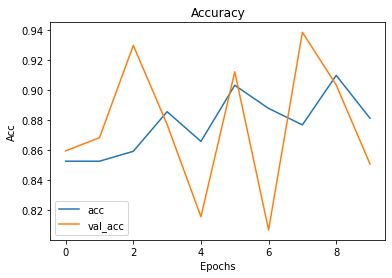

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

In [49]:
###########
# 모델 예측
###########
pred = model.predict(X_test)
pred[:10] # 0 1 1 0 0

4/4 [==============================] - 0s 5ms/step


array([[3.7615246e-01],
       [9.8846948e-01],
       [9.9446678e-01],
       [1.5703466e-02],
       [2.0862970e-13],
       [9.1679591e-05],
       [9.9596560e-01],
       [9.8110288e-01],
       [9.9667448e-01],
       [9.9807209e-01]], dtype=float32)

In [50]:
y_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [23]:
from sklearn.metrics import *

In [38]:
y_pred = pred.reshape(-1)

In [45]:
def fun(x):
  if x>=0.5:
    return 1
  else:
    return 0

v_func = np.vectorize(fun)

y_pred = v_func(y_pred)

In [46]:
accuracy_score(y_test, y_pred)

0.8508771929824561

In [47]:
recall_score(y_test, y_pred)

1.0

In [48]:
f1_score(y_test, y_pred)

0.8930817610062893

# 히든 레이어 추가하여 모델링!
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

In [ ]:
########
# 모델링
########



In [ ]:
###########
# 모델 학습
###########



In [ ]:
###########
# 모델 예측
###########

